In [345]:
import pandas as pd
import math
import numpy

### Read data

In [346]:
data_full = pd.read_csv("/Users/geoffrey/Documents/the_maneater/cpd_data_2020.csv")

### Full data analysis

In [347]:
data_full.head()

,race,gender,resident,driver_arrest,day_of_week,day_night,month,address,calltime,officer
0,W,F,Y,NO,Wed,night,Jan,NEBRASKA AVE/N PROVIDENCE RD,1/1/20 0:09,"TURNER, NATHAN D"
1,W,F,Y,NO,Wed,night,Jan,RANGE LINE ST/I70 E,1/1/20 0:36,"HILL, SCOTT M"
2,B,F,Y,NO,Wed,night,Jan,WILKES BLVD/N PROVIDENCE RD,1/1/20 0:37,"CHESLEY, NICHOLAS C"
3,B,M,Y,NO,Wed,night,Jan,BALLENGER LN/RIA ST,1/1/20 1:04,"GRILLO, JASON M"
4,W,F,Y,NO,Wed,night,Jan,FORUM BLVD,1/1/20 1:36,"HOEHNE, MARK D"


In [348]:
data = data_full[data_full['resident']=='Y']

In [568]:
day_time = pd.crosstab(index = data['day_of_week'], columns=data['day_night'])
day_time

day_night,day,night
day_of_week,,
Fri,385,594
Mon,358,396
Sat,293,619
Sun,231,466
Thu,414,590
Tue,403,423
Wed,648,695


In [ ]:
day_time_2 = pd.pivot_table(data, index = ['day_of_week'], columns)

In [460]:
data['race'].value_counts()

W    3759
B    2451
A     132
H     115
O      35
I      23
Name: race, dtype: int64

### Officer arrest breakdown

In [474]:
officer_arrest_breakdown = pd.crosstab(index=[data['officer'],data['driver_arrest']], columns=data['race'], margins=True)

In [477]:
officer_arrest_breakdown['black_proportion'] = officer_arrest_breakdown['B'] / officer_arrest_breakdown['All']

In [478]:
officer_arrest_breakdown['arrest_disparity'] = officer_arrest_breakdown['black_proportion'] / .109

In [479]:
officer_arrest_breakdown.sort_values(by = 'arrest_disparity',ascending = False).head(20)

,race,A,B,H,I,O,W,All,arrest_disparity,black_proportion
officer,driver_arrest,,,,,,,,,
"POINTER, JOSEPH W",NO,0,2,0,0,0,0,2,9.174312,1.0
"BROWN, KARL PHILLIP",YES,0,1,0,0,0,0,1,9.174312,1.0
"LEFAUVE, ANDREW K",YES,0,3,0,0,0,0,3,9.174312,1.0
"DOYLE, MICHAEL P",YES,0,1,0,0,0,0,1,9.174312,1.0
"HAAG, JORDAN",YES,0,3,0,0,0,0,3,9.174312,1.0
"FITZGERALD, MARK K",NO,0,1,0,0,0,0,1,9.174312,1.0
"WOODS, GARY D",YES,0,2,0,0,0,0,2,9.174312,1.0
"MALSY, CHAD RICK X",YES,0,1,0,0,0,0,1,9.174312,1.0
"GREMORE, MATTHEW B",YES,0,1,0,0,0,0,1,9.174312,1.0


### General arrest analysis

In [486]:
race_arrest = pd.crosstab(index = data['race'], columns=data['driver_arrest'], normalize='index')
race_arrest['disparity'] = race_arrest['YES'] / .109

In [487]:
race_arrest

driver_arrest,NO,YES,disparity
race,,,
A,0.916667,0.083333,0.764526
B,0.855161,0.144839,1.328797
H,0.808696,0.191304,1.755086
I,0.782609,0.217391,1.994416
O,0.942857,0.057143,0.524246
W,0.849694,0.150306,1.378954


In [349]:
data['day_night'].value_counts()

night    3783
day      2732
Name: day_night, dtype: int64

In [350]:
data.shape

(6515, 10)

### Values 

In [351]:
leti_grads = [
            'TURNER, NATHAN D',
            'HILL, SCOTT M',
            'GRILLO, JASON M',
            'HOEHNE, MARK D'
            'GILSTRAP, ANDREW T',
            'PETERS, BRANDON P',
            'CALDIERARO, DYLAN C',
            "O'DELL, ADAM W",
            'MOORE, DEREK C',
            'WILLIAMS, BRITTANY M',
            'ROBERTS, JACOB A',
            'WALDRUP, JACOB L',
            'WULFF, NICHOLAS B',
            'STONE, TANNER',
            'POPIELARZ, JOSHUA P',
            'NICHOLS, MATTHEW C',
            'DOYLE, MICHAEL P',
            'SINCLAIR, CLINTON M',
            'JACOBS, MICHAEL R',
            'HAMMOND, CAROLINE L',
            'PAYNE, JORDAN D',
            'MILES, TYLER RAY',
            'CORCORAN, PATRICK T',
            'KORTE, TAYLOR L',
            'MOESEL, PHILLIP D',
            'BERINGER, ZACHARY P',
            'STEVENS, RYAN M',
            'LEMOINS, DANIEL M',
            'HOPPER, JENNY C',
            'SCHUSTER, TURNER H',
            'BADEN, BRANDON K',
            'BUNCH, BRENDAN M',
            'NELSON, AUSTIN B',
            'KELLY, DYLAN A',
            'MALSY, CHAD RICK X',
            'MEYER, NATHAN J',
            'THORNSBERRY, KYLE G',
            'GERMAN, KIMBERLY D',
            'BRUNSTROM, RYAN M',
            'TEEGARDEN, JOSHUA B',
            'BODDIE, NICHOLAS S',
            'YARNELL, JACOB A',
            'GLANDON, NICHOLAS A',
            'THOMPSON, CHRISTOPHER C',
            'WRIGHT, MATTHEW E',
            'STEVENS, SPIRIT D',
            'CHIANG, GEORGE J',
            'SHULL, PHILLIP S',
            'DAWKINS, COURTNEY A',
            'THOMAS, JUSTIN W',
            'WHITMIRE, BENJAMIN KYLE',
            'KILE, MICHAEL D',
            'FITZGERALD, MARK K',
            'MEYER, JAMES ANDY',
            'GILLIAM, JUSTIN K',
            'DEORNELLAS, KYLE',
            'SIMPSON, LORI A',
            'DOWLER, JAMESON R',
            'WIEGMAN, ERIC R',
            'MABE, RICK L JR',
            'HOBBS, CHRISTOPHER R',
            'MCCULLOCH, JOSHUA C',
            'DAMERON, MALIQUE O`NEAL',
            'OWENS, JEREMIAH A',
            'BOLINGER, LANCE RILEY',
            'PHELPS, MARIA N',
            'POINTER, JOSEPH W',
            'HESTIR, MICHAEL P',
            'MILLS, JADE',
            'SCOTT, NATHANIEL D',
            'BAKER, BRANDON W',
            'RANEY, CORINNE D',
            'MORRIS, MARANDA',
            'WARD, ADAM M',
            'POTTORFF, GARDNER',
            'DAWKINS, CORY A',
            'MUELLER, JOEL P',
            'WILD, ETHAN D',
            'TURNBOUGH, CALEB E',
            'EUER, PARKER R',
            'BROWN, KARL PHILLIP',
            'WILLIAMS, CHRISTOPHER P',
            'JUNCU, MARIUS A',
            'ANDERSON, DOUGLAS L',
            'SAUCEDA, JONATHAN G',
            'NICHOLS, THOMAS CHRISTOPHER'
             ]

In [352]:
downtown_streets = ['ELM',"CHERRY",'LOCUST','E BROADWAY','WALNUT','S FIFTH','S SIXTH','S SEVENTH','S EIGHTH','S NINTH','S TENTH']

In [353]:
campus_streets = ['CONLEY','ROLLINS','TIGER','HITT']

### Flags

#### Downtown Flag

In [354]:
data['downtown_flag']=[True if any(y in x for y in downtown_streets) else False for x in data['address'].fillna('X')] 

<ipython-input-354-3340b1ca280e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['downtown_flag']=[True if any(y in x for y in downtown_streets) else False for x in data['address'].fillna('X')]


In [355]:
data['downtown_flag'].value_counts()

False    6010
True      505
Name: downtown_flag, dtype: int64

#### LETI Flag

In [356]:
data['leti_flag']=[True if any(y in x for y in leti_grads) else False for x in data['officer'].fillna('X')] 

<ipython-input-356-d0882da08a62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['leti_flag']=[True if any(y in x for y in leti_grads) else False for x in data['officer'].fillna('X')]


In [357]:
data['leti_flag'].value_counts()

True     4687
False    1828
Name: leti_flag, dtype: int64

#### Campus Flag

In [358]:
data['campus_flag'] = [True if any(y in x for y in campus_streets) else False for x in data['address'].fillna('X')]

<ipython-input-358-8f3a84f4266e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['campus_flag'] = [True if any(y in x for y in campus_streets) else False for x in data['address'].fillna('X')]


In [359]:
data['campus_flag'].value_counts()

False    6269
True      246
Name: campus_flag, dtype: int64

In [360]:
data.head()

,race,gender,resident,driver_arrest,day_of_week,day_night,month,address,calltime,officer,downtown_flag,leti_flag,campus_flag
0,W,F,Y,NO,Wed,night,Jan,NEBRASKA AVE/N PROVIDENCE RD,1/1/20 0:09,"TURNER, NATHAN D",False,True,False
1,W,F,Y,NO,Wed,night,Jan,RANGE LINE ST/I70 E,1/1/20 0:36,"HILL, SCOTT M",False,True,False
2,B,F,Y,NO,Wed,night,Jan,WILKES BLVD/N PROVIDENCE RD,1/1/20 0:37,"CHESLEY, NICHOLAS C",False,False,False
3,B,M,Y,NO,Wed,night,Jan,BALLENGER LN/RIA ST,1/1/20 1:04,"GRILLO, JASON M",False,True,False
4,W,F,Y,NO,Wed,night,Jan,FORUM BLVD,1/1/20 1:36,"HOEHNE, MARK D",False,False,False


### Column Value Counts

In [361]:
data['address'].value_counts()

PARIS RD                        158
E BUSINESS LOOP 70              155
CLARK LN                        132
RANGE LINE ST                    82
W BUSINESS LOOP 70               74
                               ... 
W ASH ST/RIDGEWAY AVE             1
S PROVIDENCE RD/CHAMPIONS DR      1
W NIFONG BLVD/WOODS EDGE RD       1
N NINTH ST/PARK AVE               1
N SEVENTH ST/E BROADWAY           1
Name: address, Length: 1690, dtype: int64

In [362]:
data['race'].value_counts()

W    3759
B    2451
A     132
H     115
O      35
I      23
Name: race, dtype: int64

In [363]:
data['officer'].value_counts()

JUNCU, MARIUS A        718
SIMPSON, LORI A        466
PAYNE, JORDAN D        349
WOLF, BRADLEY E        317
HOEHNE, MARK D         316
                      ... 
FITZGERALD, MARK K       1
LUCAS, KYLE PATRICK      1
JONES, GEOFFREY J        1
HANKS, MICHAEL DEAN      1
TATE, BRIAN D            1
Name: officer, Length: 137, dtype: int64

### Create officer_data dataframe

In [371]:
officer_data = pd.crosstab(index=data['officer'], columns=data['race']).reset_index()

In [374]:
officer_data.head()

race,officer,A,B,H,I,O,W
0,"ALPERS, SCOTT M",0,1,0,0,0,2
1,"ANDERSON, DOUGLAS L",0,4,0,0,1,8
2,"ANDERSON, LEVI D",0,12,0,0,1,18
3,"ASH, ANTHONY EUGENE",0,2,0,0,0,5
4,"BADEN, BRANDON K",0,62,1,0,0,62


In [375]:
officer_data['leti_flag']=[True if any(y in x for y in leti_grads) else False for x in officer_data['officer'].fillna('X')] 

In [376]:
officer_data.dtypes

race
officer      object
A             int64
B             int64
H             int64
I             int64
O             int64
W             int64
leti_flag      bool
dtype: object

In [377]:
officer_data['total_stops'] = officer_data['A'] + officer_data['B'] + officer_data['H'] + officer_data['I']+ officer_data['O'] + officer_data['W']

In [378]:
officer_data.head()

race,officer,A,B,H,I,O,W,leti_flag,total_stops
0,"ALPERS, SCOTT M",0,1,0,0,0,2,False,3
1,"ANDERSON, DOUGLAS L",0,4,0,0,1,8,True,13
2,"ANDERSON, LEVI D",0,12,0,0,1,18,False,31
3,"ASH, ANTHONY EUGENE",0,2,0,0,0,5,False,7
4,"BADEN, BRANDON K",0,62,1,0,0,62,True,125


In [379]:
officer_data['black_proportion'] = officer_data['B'] / officer_data['total_stops']
officer_data.head()

race,officer,A,B,H,I,O,W,leti_flag,total_stops,black_proportion
0,"ALPERS, SCOTT M",0,1,0,0,0,2,False,3,0.333333
1,"ANDERSON, DOUGLAS L",0,4,0,0,1,8,True,13,0.307692
2,"ANDERSON, LEVI D",0,12,0,0,1,18,False,31,0.387097
3,"ASH, ANTHONY EUGENE",0,2,0,0,0,5,False,7,0.285714
4,"BADEN, BRANDON K",0,62,1,0,0,62,True,125,0.496000


In [380]:
officer_data.dtypes

race
officer              object
A                     int64
B                     int64
H                     int64
I                     int64
O                     int64
W                     int64
leti_flag              bool
total_stops           int64
black_proportion    float64
dtype: object

### Officer z score calculations

In [381]:
officer_data['p_hat'] = (officer_data['B'] + 10971 )/ (officer_data['total_stops'] + 100650)
officer_data['p_hat']

0      0.109008
1      0.109027
2      0.109087
3      0.109014
4      0.109482
         ...   
132    0.109017
133    0.108996
134    0.109100
135    0.109368
136    0.109025
Name: p_hat, Length: 137, dtype: float64

In [382]:
officer_data['z_score_num'] = (officer_data['black_proportion'] - .109)

In [383]:
officer_data['z_score_denom'] = (officer_data['p_hat'] * (1-officer_data['p_hat']))* ( (1 / officer_data['total_stops']) + (1 / 100650))

In [384]:
officer_data['z_score'] = officer_data['z_score_num'] / numpy.sqrt(officer_data['z_score_denom'])

In [464]:
officer_data['disparity_index'] = officer_data['black_proportion'] / .109

In [465]:
officer_data.sort_values(by='z_score',ascending = False)

race,officer,A,B,H,I,O,W,leti_flag,total_stops,black_proportion,p_hat,z_score_num,z_score_denom,z_score,problem_flag,disparity_index
103,"ROBERTS, JACOB A",1,108,3,4,0,69,True,185,0.583784,0.109873,0.474784,0.000530,20.630619,True,5.355815
18,"DAMERON, MALIQUE O`NEAL",4,113,5,0,0,89,True,211,0.535545,0.109894,0.426545,0.000465,19.789910,True,4.913257
91,"PAYNE, JORDAN D",6,150,10,5,0,178,True,349,0.429799,0.110110,0.320799,0.000282,19.112307,True,3.943114
122,"TURNER, NATHAN D",2,104,5,0,0,119,True,230,0.452174,0.109784,0.343174,0.000426,16.628975,True,4.148385
135,"WULFF, NICHOLAS B",0,43,0,0,2,11,True,56,0.767857,0.109368,0.658857,0.001740,15.793211,True,7.044561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,"DECKER, SCOTT A",0,0,0,0,0,3,False,3,0.000000,0.108998,-0.109000,0.032374,-0.605803,False,0.000000
133,"WRIGHT, DANIEL J",0,0,0,0,0,5,False,5,0.000000,0.108996,-0.109000,0.019424,-0.782088,False,0.000000
8,"BOYLE, CHRISTOPHER T",1,0,0,0,0,4,False,5,0.000000,0.108996,-0.109000,0.019424,-0.782088,False,0.000000
59,"JONES, JASON R",0,0,0,0,0,6,False,6,0.000000,0.108995,-0.109000,0.016187,-0.856734,False,0.000000


### Problem flag
#### Extreme of concern value

In [386]:
# Problem flag set at z-score = 4.9 because at that point p-value becomes ~0, or essentially impossible
officer_data['problem_flag']= [True if x >= 4.9 else False for x in officer_data['z_score'].fillna('X')]

In [559]:
officer_data['problem_flag'].value_counts()

False    83
True     54
Name: problem_flag, dtype: int64

In [388]:
officer_data.head()

race,officer,A,B,H,I,O,W,leti_flag,total_stops,black_proportion,p_hat,z_score_num,z_score_denom,z_score,problem_flag
0,"ALPERS, SCOTT M",0,1,0,0,0,2,False,3,0.333333,0.109008,0.224333,0.032376,1.246756,False
1,"ANDERSON, DOUGLAS L",0,4,0,0,1,8,True,13,0.307692,0.109027,0.198692,0.007473,2.298397,False
2,"ANDERSON, LEVI D",0,12,0,0,1,18,False,31,0.387097,0.109087,0.278097,0.003136,4.965987,True
3,"ASH, ANTHONY EUGENE",0,2,0,0,0,5,False,7,0.285714,0.109014,0.176714,0.013877,1.500132,False
4,"BADEN, BRANDON K",0,62,1,0,0,62,True,125,0.496000,0.109482,0.387000,0.000781,13.848559,True


In [560]:
officer_data.shape

(137, 16)

In [565]:
officer_full_data.head()

,officer,A,B,H,I,O,W,leti_flag,total_stops,black_proportion,p_hat,z_score_num,z_score_denom,z_score,problem_flag,disparity_index,no_arrest,arrest,concern_level
0,"ALPERS, SCOTT M",0,1,0,0,0,2,False,3,0.333333,0.109008,0.224333,0.032376,1.246756,False,3.058104,3,0,Moderate Concern (20-10%)
1,"ANDERSON, DOUGLAS L",0,4,0,0,1,8,True,13,0.307692,0.109027,0.198692,0.007473,2.298397,False,2.822865,13,0,Serious Concern (5-1%)
2,"ANDERSON, LEVI D",0,12,0,0,1,18,False,31,0.387097,0.109087,0.278097,0.003136,4.965987,True,3.551347,30,1,Dangerous Concern (1-0.01%)
3,"ASH, ANTHONY EUGENE",0,2,0,0,0,5,False,7,0.285714,0.109014,0.176714,0.013877,1.500132,False,2.621232,7,0,Significant Concern (10-5%)
4,"BADEN, BRANDON K",0,62,1,0,0,62,True,125,0.496000,0.109482,0.387000,0.000781,13.848559,True,4.550459,113,12,Dangerous Concern (1-0.01%)


In [563]:
officer_full_data.shape

(137, 19)

In [389]:
leti_officer_data = officer_data[officer_data['leti_flag']==True]

In [390]:
non_leti_officer_data = officer_data[officer_data['leti_flag']==False]

In [391]:
leti_officer_data['problem_flag'].value_counts(normalize=True)

False    0.530864
True     0.469136
Name: problem_flag, dtype: float64

In [392]:
non_leti_officer_data['problem_flag'].value_counts(normalize=True)

False    0.714286
True     0.285714
Name: problem_flag, dtype: float64

### Histograms

<AxesSubplot:>

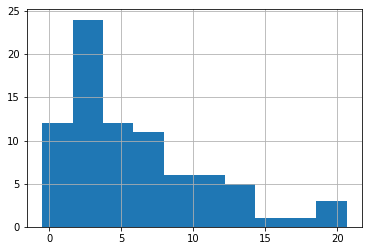

In [393]:
leti_officer_data['z_score'].hist()

<AxesSubplot:>

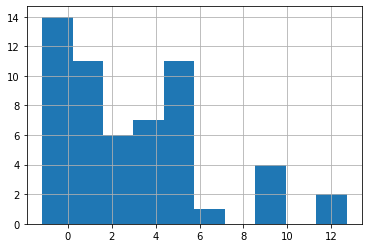

In [394]:
non_leti_officer_data['z_score'].hist()

<AxesSubplot:>

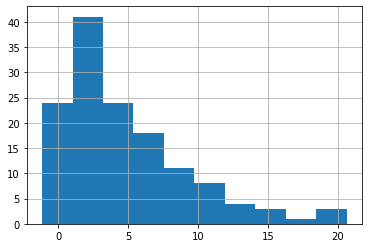

In [395]:
officer_data['z_score'].hist()

### Assigning concern levels

In [497]:
min(officer_data['z_score'])
max(officer_data['z_score'])

20.63061888167529

In [531]:
officer_z_scores = officer_data[['officer','z_score']]
officer_z_scores.head()

race,officer,z_score
0,"ALPERS, SCOTT M",1.246756
1,"ANDERSON, DOUGLAS L",2.298397
2,"ANDERSON, LEVI D",4.965987
3,"ASH, ANTHONY EUGENE",1.500132
4,"BADEN, BRANDON K",13.848559


#### Concern level ranges function

In [544]:
def get_concern_ranks(z_score):
        if z_score <= 0:
            return 'No Concern (>50%)'
        elif 0 < z_score <= 0.84:
            return 'Little Concern (50-20%)'
        elif 0.84 < z_score <= 1.28:
            return 'Moderate Concern (20-10%)'
        elif 1.28 < z_score <= 1.64:
            return 'Significant Concern (10-5%)'
        elif 1.64 < z_score <= 3.72:
            return 'Serious Concern (5-1%)'
        else:
            return 'Dangerous Concern (1-0.01%)'

In [542]:
officer_z_scores.dtypes

race
officer     object
z_score    float64
dtype: object

#### Applying concern function to columns

In [548]:
officer_z_scores['concern_level'] = officer_z_scores['z_score'].apply(get_concern_ranks)

<ipython-input-548-6f9c3951e602>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officer_z_scores['concern_level'] = officer_z_scores['z_score'].apply(get_concern_ranks)


In [549]:
get_concern_ranks(1.2)

'Moderate Concern (20-10%)'

In [558]:
officer_z_scores['concern_level'].value_counts()

Dangerous Concern (1-0.01%)    67
Serious Concern (5-1%)         33
No Concern (>50%)              16
Little Concern (50-20%)         8
Moderate Concern (20-10%)       7
Significant Concern (10-5%)     6
Name: concern_level, dtype: int64

<AxesSubplot:>

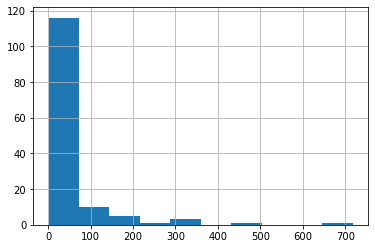

In [396]:
officer_data['total_stops'].hist()

### Arrest analysis

In [432]:
arrests = data[data['driver_arrest']=="YES"]
arrests.head()

,race,gender,resident,driver_arrest,day_of_week,day_night,month,address,calltime,officer,downtown_flag,leti_flag,campus_flag
5,W,M,Y,YES,Wed,night,Jan,W BROADWAY/S GREENWOOD AVE,1/1/20 2:04,"HOEHNE, MARK D",False,False,False
62,B,M,Y,YES,Thu,night,Jan,CLARK LN,1/2/20 1:02,"WULFF, NICHOLAS B",False,True,False
92,B,F,Y,YES,Thu,night,Jan,BINGHAM RD/S PROVIDENCE RD,1/2/20 22:39,"HAMMOND, CAROLINE L",False,True,False
96,W,F,Y,YES,Thu,night,Jan,N GARTH AVE/E WORLEY ST,1/2/20 23:15,"MILES, TYLER RAY",False,True,False
104,B,F,Y,YES,Fri,day,Jan,PARIS RD,1/3/20 12:03,"PETERS, BRANDON P",False,True,False


In [453]:
arrests_crosstab = pd.crosstab(index=data['race'], columns=data['driver_arrest'], normalize = 'index')
arrests_crosstab

driver_arrest,NO,YES
race,,
A,0.916667,0.083333
B,0.855161,0.144839
H,0.808696,0.191304
I,0.782609,0.217391
O,0.942857,0.057143
W,0.849694,0.150306


In [443]:
officer_arrest_data = pd.crosstab(index=data['officer'], columns=data['driver_arrest']).reset_index().fillna("X")

In [444]:
officer_arrest_data

driver_arrest,officer,NO,YES
0,"ALPERS, SCOTT M",3,0
1,"ANDERSON, DOUGLAS L",13,0
2,"ANDERSON, LEVI D",30,1
3,"ASH, ANTHONY EUGENE",7,0
4,"BADEN, BRANDON K",113,12
...,...,...,...
132,"WOODS, GARY D",2,2
133,"WRIGHT, DANIEL J",5,0
134,"WRIGHT, MATTHEW E",23,5
135,"WULFF, NICHOLAS B",46,10


In [446]:
officer_arrest_data = officer_arrest_data.rename(columns = {"NO":"no_arrest","YES":"arrest"})

### officer_full_data columns: 
officer, RACES (A,B,H,I,O,W), leti_flag, total_stops, black_proportion, p_hat, z_score_num, z_score_denom, z_score, problem_flag, no_arrest, arrest

In [466]:
officer_full_data = officer_data.merge(officer_arrest_data,how='right',on='officer').fillna("X")

In [512]:
officer_full_data.head()

,officer,A,B,H,I,O,W,leti_flag,total_stops,black_proportion,p_hat,z_score_num,z_score_denom,z_score,problem_flag,disparity_index,no_arrest,arrest
0,"ALPERS, SCOTT M",0,1,0,0,0,2,False,3,0.333333,0.109008,0.224333,0.032376,1.246756,False,3.058104,3,0
1,"ANDERSON, DOUGLAS L",0,4,0,0,1,8,True,13,0.307692,0.109027,0.198692,0.007473,2.298397,False,2.822865,13,0
2,"ANDERSON, LEVI D",0,12,0,0,1,18,False,31,0.387097,0.109087,0.278097,0.003136,4.965987,True,3.551347,30,1
3,"ASH, ANTHONY EUGENE",0,2,0,0,0,5,False,7,0.285714,0.109014,0.176714,0.013877,1.500132,False,2.621232,7,0
4,"BADEN, BRANDON K",0,62,1,0,0,62,True,125,0.496000,0.109482,0.387000,0.000781,13.848559,True,4.550459,113,12


In [449]:
officer_full_data.shape

(137, 17)

In [554]:
officer_full_data['concern_level'] = officer_full_data['z_score'].apply(get_concern_ranks)

In [555]:
officer_full_data.to_csv('officer_full_data.csv')

In [416]:
officer_full_data['arrest_percent'] = officer_full_data['arrest'] / officer_full_data['total_stops']

In [417]:
officer_full_data.head()

,officer,A,B,H,I,O,W,leti_flag,total_stops,black_proportion,p_hat,z_score_num,z_score_denom,z_score,problem_flag,no_arrest,arrest,arrest_percent
0,"ALPERS, SCOTT M",0,1,0,0,0,2,False,3,0.333333,0.109008,0.224333,0.032376,1.246756,False,3,0,0.000000
1,"ANDERSON, DOUGLAS L",0,4,0,0,1,8,True,13,0.307692,0.109027,0.198692,0.007473,2.298397,False,13,0,0.000000
2,"ANDERSON, LEVI D",0,12,0,0,1,18,False,31,0.387097,0.109087,0.278097,0.003136,4.965987,True,30,1,0.032258
3,"ASH, ANTHONY EUGENE",0,2,0,0,0,5,False,7,0.285714,0.109014,0.176714,0.013877,1.500132,False,7,0,0.000000
4,"BADEN, BRANDON K",0,62,1,0,0,62,True,125,0.496000,0.109482,0.387000,0.000781,13.848559,True,113,12,0.096000


In [418]:
officer_full_data.shape

(137, 18)

In [420]:
officer_full_data.sort_values(by='arrest_percent', ascending = False)

,officer,A,B,H,I,O,W,leti_flag,total_stops,black_proportion,p_hat,z_score_num,z_score_denom,z_score,problem_flag,no_arrest,arrest,arrest_percent
124,"WARD, ADAM M",0,1,0,0,0,0,True,1,1.000000,0.109010,0.891000,0.097128,2.858942,False,0,1,1.000000
50,"HOEHNE, MARK D",9,87,1,0,0,219,False,316,0.275316,0.109522,0.166316,0.000310,9.452262,True,124,192,0.607595
120,"THORNSBERRY, KYLE G",0,2,0,1,0,2,True,5,0.400000,0.109016,0.291000,0.019427,2.087792,False,2,3,0.600000
10,"BROWN, KARL PHILLIP",0,2,0,0,0,0,True,2,1.000000,0.109019,0.891000,0.048568,4.042991,False,1,1,0.500000
132,"WOODS, GARY D",0,2,0,0,0,2,False,4,0.500000,0.109017,0.391000,0.024284,2.509090,False,2,2,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,"JONES, GEOFFREY J",0,0,0,0,0,1,False,1,0.000000,0.109000,-0.109000,0.097120,-0.349761,False,1,0,0.000000
57,"JACOBS, MICHAEL R",3,17,0,0,0,40,True,60,0.283333,0.109105,0.174333,0.001621,4.330025,False,60,0,0.000000
56,"JACKSON, JOSEPH C",0,5,0,0,0,23,False,28,0.178571,0.109021,0.069571,0.003470,1.181030,False,28,0,0.000000
55,"HOUSTON, BRUCE",0,2,0,0,1,4,False,7,0.285714,0.109014,0.176714,0.013877,1.500132,False,7,0,0.000000


### Scatterplots

<AxesSubplot:xlabel='total_stops', ylabel='arrest_percent'>

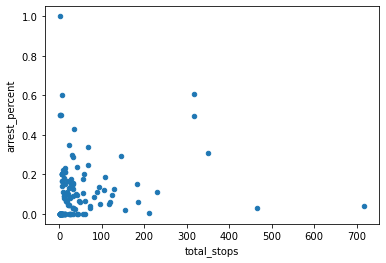

In [426]:
officer_full_data.plot.scatter(x = 'total_stops', y='arrest_percent')

<AxesSubplot:xlabel='disparity_index', ylabel='z_score'>

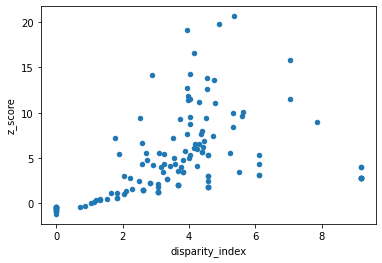

In [468]:
officer_full_data.plot.scatter(x = 'disparity_index', y='z_score')